#Importing Libraries

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Dataset Exploration and import

## Total data points:1338

### Independant Variables
* Age
* gender
* bmi
* children
* smoker
* region


### Dependant Variable
* charges


In [39]:
dataset = pd.read_csv('/content/insurance_data.csv', sep=",")
print(dataset.head())
print("\n Dataset Dimensions: ", dataset.shape)


# Basic statistics of the variables

basic_stats = dataset.describe()
print('\n\n\nBasic Stats\n', basic_stats)


   age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  islamabad  16884.92400
1   18    male  33.770         1     no     lahore   1725.55230
2   28    male  33.000         3     no     lahore   4449.46200
3   33    male  22.705         0     no        kpk  21984.47061
4   32    male  28.880         0     no        kpk   3866.85520

 Dataset Dimensions:  (1338, 7)



Basic Stats
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


#Checking Null Values


In [40]:
# Check for null values
null_values = dataset.isnull().sum()

# Calculate the percentage of null values in each column
percentage_null = (null_values / len(dataset)) * 100

# Create a summary DataFrame
summary = pd.DataFrame({
    'Column Name': null_values.index,
    'Null Values': null_values.values,
    'Percentage Null': percentage_null.values
})

# Display the summary
print(summary)

  Column Name  Null Values  Percentage Null
0         age            0              0.0
1      gender            0              0.0
2         bmi            0              0.0
3    children            0              0.0
4      smoker            0              0.0
5      region            0              0.0
6     charges            0              0.0


#Label encoding for categorical Features

In [41]:
# Perform one-hot encoding
dataset_encoded = pd.get_dummies(dataset, columns=['gender', 'smoker', 'region'], drop_first=True)

# Initialize LabelEncoders
label_encoders = {}
categorical_columns = ['gender', 'smoker', 'region']

for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

print(dataset)



      age  gender     bmi  children  smoker  region      charges
0      19       0  27.900         0       1       1  16884.92400
1      18       1  33.770         1       0       3   1725.55230
2      28       1  33.000         3       0       3   4449.46200
3      33       1  22.705         0       0       2  21984.47061
4      32       1  28.880         0       0       2   3866.85520
...   ...     ...     ...       ...     ...     ...          ...
1333   50       1  30.970         3       0       2  10600.54830
1334   18       0  31.920         0       0       0   2205.98080
1335   18       0  36.850         0       0       3   1629.83350
1336   21       0  25.800         0       0       1   2007.94500
1337   61       0  29.070         0       1       2  29141.36030

[1338 rows x 7 columns]


#Dataset Visualization

###Scatter Plots

###&

###Covariance Matrix

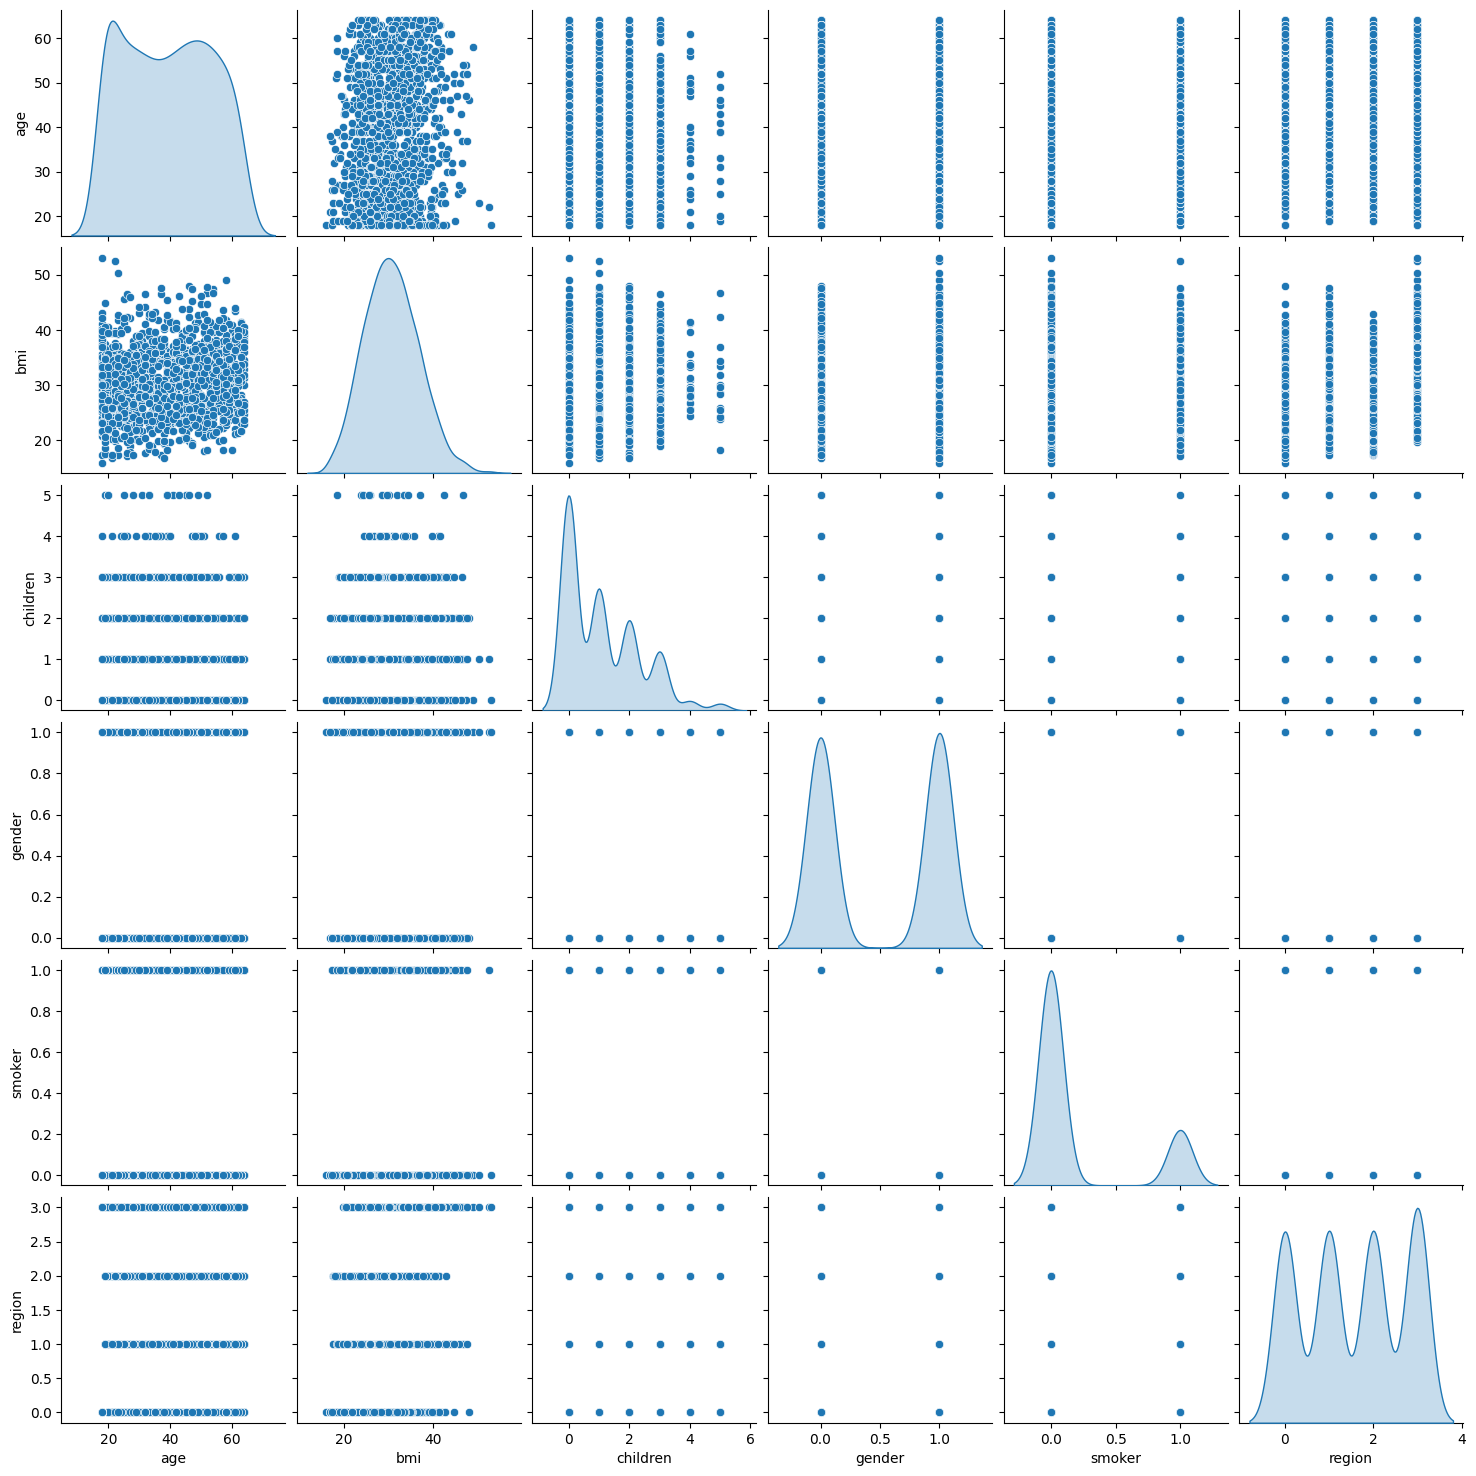

In [42]:
sns.pairplot(data=dataset, vars=['age', 'bmi', 'children', 'gender', 'smoker', 'region'], diag_kind='kde')
plt.show()

In [43]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')


,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.010265,0.299008
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.010170,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.213489,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.000107,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.038873,0.787251
region,-0.010265,0.010170,0.213489,-0.000107,0.038873,1.000000,0.040728
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.040728,1.000000


#Dataset Splitting

In [44]:

# Split the dataset into features (X) and the target variable (y)
y = dataset['charges']
X = dataset.drop(columns=['charges'])

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1070, 6)
y_train shape: (1070,)
X_test shape: (268, 6)
y_test shape: (268,)


## Standardization

In [48]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation and test data using the same scaler
X_test = scaler.transform(X_test)

# Print the shapes of the scaled sets to verify
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)

X_train_scaled shape: (1070, 6)
X_test_scaled shape: (268, 6)


#Multivariate Linear Regression using scikit-learn

In [51]:
# Fitting a multivariate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)


#Evaluation

In [52]:
# Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Model Accuracy',model.score(X_test,y_test))

R^2 Score: 0.7824
Mean Absolute Error (MAE): 4193.87
Mean Squared Error (MSE): 33780938.35
Model Accuracy 0.782407636947657


#Part 2

###Listing Important Features based on Linear Regression model coefficients


In [54]:
# Get feature importance based on model coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance)

Feature Importance:
    Feature  Coefficient  Absolute_Coefficient
4    smoker  9563.743118           9563.743118
0       age  3612.402676           3612.402676
2       bmi  2014.324094           2014.324094
3  children   518.789108            518.789108
5    region  -169.641807            169.641807
1    gender    -5.189442              5.189442


#Scatter plots between Variables and Target Variable



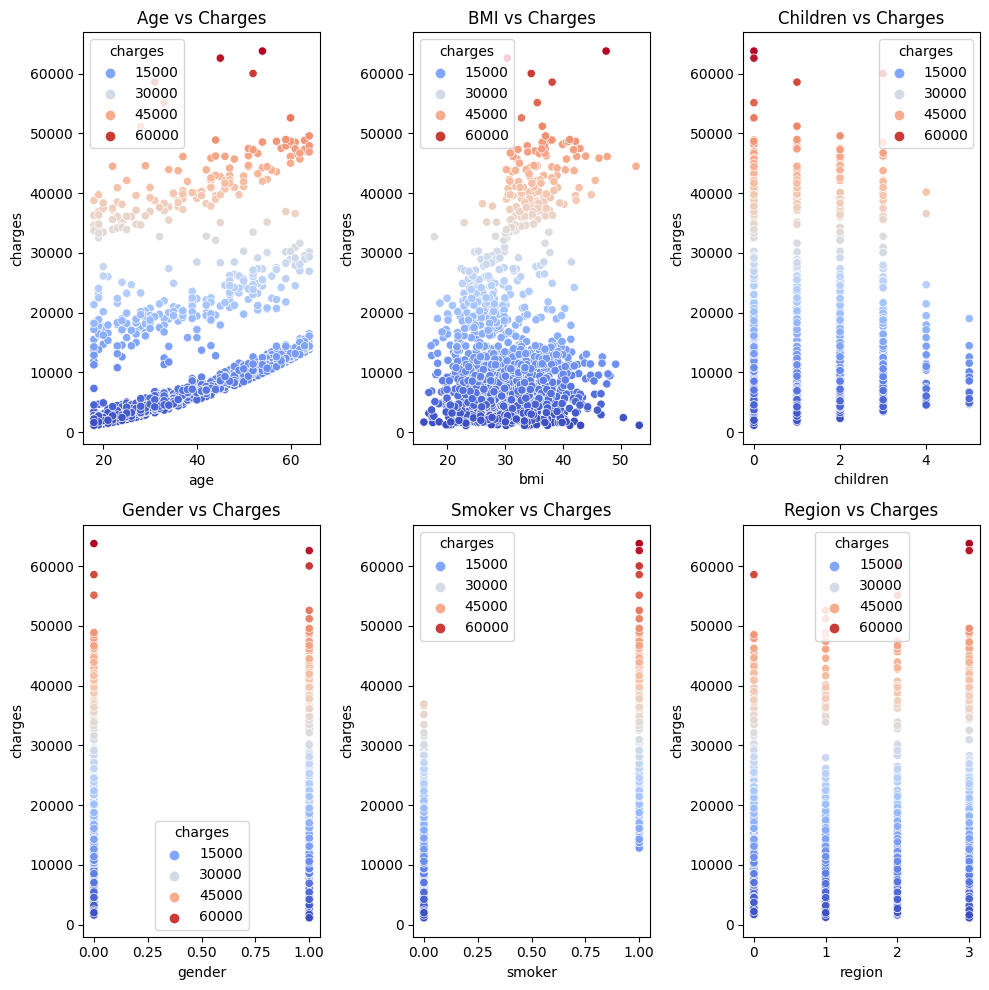

In [57]:
plt.figure(figsize=(10, 10))


plt.subplot(231)
sns.scatterplot(x='age', y='charges', data=dataset, hue='charges', palette='coolwarm')
plt.title('Age vs Charges')


plt.subplot(232)
sns.scatterplot(x='bmi', y='charges', data=dataset, hue='charges', palette='coolwarm')
plt.title('BMI vs Charges')


plt.subplot(233)
sns.scatterplot(x='children', y='charges', data=dataset, hue='charges', palette='coolwarm')
plt.title('Children vs Charges')


plt.subplot(234)
sns.scatterplot(x='gender', y='charges', data=dataset, hue='charges', palette='coolwarm')
plt.title('Gender vs Charges')


plt.subplot(235)
sns.scatterplot(x='smoker', y='charges', data=dataset, hue='charges', palette='coolwarm')
plt.title('Smoker vs Charges')


plt.subplot(236)
sns.scatterplot(x='region', y='charges', data=dataset, hue='charges', palette='coolwarm')
plt.title('Region vs Charges')


plt.tight_layout()
plt.show()


###### Visually it can be seen that Smoker , age and bmi are distinctive features

#Traning using subset of features

In [58]:

sub_dataset = pd.read_csv('/content/insurance_data.csv', sep=",")

label_encoder = LabelEncoder()

sub_dataset['gender_encoded'] = label_encoder.fit_transform(sub_dataset['gender'])
sub_dataset['smoker_encoded'] = label_encoder.fit_transform(sub_dataset['smoker'])
sub_dataset['region_encoded'] = label_encoder.fit_transform(sub_dataset['region'])


sub_dataset = sub_dataset.drop(['gender', 'smoker', 'region'], axis=1)
print(sub_dataset)



      age     bmi  children      charges  gender_encoded  smoker_encoded  \
0      19  27.900         0  16884.92400               0               1   
1      18  33.770         1   1725.55230               1               0   
2      28  33.000         3   4449.46200               1               0   
3      33  22.705         0  21984.47061               1               0   
4      32  28.880         0   3866.85520               1               0   
...   ...     ...       ...          ...             ...             ...   
1333   50  30.970         3  10600.54830               1               0   
1334   18  31.920         0   2205.98080               0               0   
1335   18  36.850         0   1629.83350               0               0   
1336   21  25.800         0   2007.94500               0               0   
1337   61  29.070         0  29141.36030               0               1   

      region_encoded  
0                  1  
1                  3  
2                 

###Sub_dataset Design

In [59]:
X = sub_dataset[['smoker_encoded','age']]
y = sub_dataset['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Model Accuracy',model.score(X_test,y_test))

R^2 Score: 0.7535
Mean Absolute Error (MAE): 3990.98
Mean Squared Error (MSE): 38274699.68
Model Accuracy 0.7534620778716639


#Predictiton using Model by giving Input Features
### 1 for smoker and 0 for Non-Smoker

In [60]:
user_status = float(input("smoker or Non-Smoker?: "))
user_age = float(input("Enter your age: "))

# Create a NumPy array with user input
user_input = np.array([[user_status, user_age]])


# Standardize the user input using the same scaler
user_input = scaler.transform(user_input)

# Predict 'charges' for the user input
user_predicted_charges = model.predict(user_input)

# Print the predicted charges
print(f'Predicted Charges: {user_predicted_charges[0]:.2f}')

smoker or Non-Smoker?: 1
Enter your age: 25
Predicted Charges: 28201.47


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Comparison Summary provided in the project PDF file